In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page containing the table
url = "https://en.wikipedia.org/wiki/2018%E2%80%9319_FC_Barcelona_season"

# Send a GET request to the URL and store the HTML response
response = requests.get(url)

# Parse the HTML response using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table element using its class attribute
table = soup.find("table", {"class": "wikitable sortable"})

# Extract the table header row
header_row = table.find("tr")
headers = [header.text.strip() for header in header_row.find_all("th")]

# Extract the table data rows
data_rows = table.find_all("tr")[1:]
data = []
for row in data_rows:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    data.append(cells)

# Create a Pandas DataFrame from the table data
df = pd.DataFrame(data, columns=headers)

# Write the DataFrame to a CSV file
df.to_csv("barca.csv", index=False)


In [2]:
table1 = soup.find("table", {"class": "wikitable sortable"})

# All the element to extract data from had the same class name
# Find the second table element by finding the next sibling of the first table
table2 = table1.find_next_sibling("table", {"class": "wikitable sortable"})

header_row = table2.find("tr")
headers = [header.text.strip() for header in header_row.find_all("th")]
data_rows = table2.find_all("tr")[1:]
data = []
for row in data_rows:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    data.append(cells)
df = pd.DataFrame(data, columns=headers)
df.to_csv("barca.csv", index=False)

In [3]:
# Find the third table element
table3 = table2.find_next_sibling("table", {"class": "wikitable sortable"})

header_row = table3.find("tr")
headers = [header.text.strip() for header in header_row.find_all("th")]
data_rows = table3.find_all("tr")[1:]
data = []
for row in data_rows:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    data.append(cells)
df = pd.DataFrame(data, columns=headers)
df.to_csv("barca.csv", index=False)

In [4]:
table4 = table3.find_next_sibling("table", {"class": "wikitable sortable"})

header_row = table4.find("tr")
headers = [header.text.strip() for header in header_row.find_all("th")]
data_rows = table4.find_all("tr")[1:]
data = []
for row in data_rows:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    data.append(cells)
df = pd.DataFrame(data, columns=headers)
df.to_csv("barca.csv", index=False)

In [5]:
table5 = table4.find_next_sibling("table", {"class": "wikitable sortable"})

header_row = table5.find("tr")
headers = [header.text.strip() for header in header_row.find_all("th")]
data_rows = table5.find_all("tr")[1:]
data = []
for row in data_rows:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    data.append(cells)
df = pd.DataFrame(data, columns=headers)
df.to_csv("barca.csv", index=False)

### Summary
I had collected data about FC Barcelona's 2018/2019 season involves gathering information about their player transfers in and out, as well as the team's loans in and out. This data would provide insight into the club's recruitment strategies and player development


## With the data that collected there are several questions that can be answered such as :
### What was the net spending on transfers during the 2018/2019 season
### Which players were the most expensive transfers during the 2018/2019 season
### What was the average transfer fee for players bought by Barcelona during the 2018/2019 season?
### Which positions did Barcelona focus on strengthening during the 2018/2019 season



# <font color="red"> We start our analysis by answering the questions:</font>
### <font color="green"> First question:What was the net spending on transfers during the 2018/2019 season?</font>

To answer the first question we need to have data on the total amount spent on buying players and the total amount received from selling players.Once we have this data, we can calculate the net spending on transfers by subtracting the total amount received from the total amount spent.

In [17]:
import pandas as pd

#Import data about the transfers in from the excel file
transfer_in = pd.read_excel('Transfers_in.xlsx', sheet_name='barca (2)')
print('All transfer in for Barcelona: \n \n' + transfer_in.to_string(index=False))

#Import data about the transfers out from the excel file
transfer_out = pd.read_excel('Transfers_out.xlsx', sheet_name='barca (2)')
print('\n All transfer out for Barcelona: \n \n' + transfer_out.to_string(index=False))

All transfer in for Barcelona: 
 
Entry date Position  No.            Player     From club      Fee
2018-07-09       MF    8            Arthur        Grêmio 31000000
2018-07-12       DF   15   Clément Lenglet       Sevilla 35900000
2018-07-24       FW   14            Malcom      Bordeaux 41000000
2018-08-03       MF   22      Arturo Vidal Bayern Munich 19000000
2019-01-31       DF    6 Jean-Clair Todibo      Toulouse  1000000

 All transfer out for Barcelona: 
 
         Exit date Position No.          Player              To club      Fee
    1 July 2018[A]       MF   8  Andrés Iniesta          Vissel Kobe        0
    1 July 2018[B]       FW   — Gerard Deulofeu              Watford 13000000
     1 August 2018       DF  19     Lucas Digne              Everton 20200000
     4 August 2018       DF  22     Aleix Vidal              Sevilla  8500000
     9 August 2018       DF  24      Yerry Mina              Everton 30250000
    16 August 2018       DF   —          Marlon             Sassu

In [18]:
#Calculate sum of the transfers in
sum_in = transfer_in['Fee'].sum()
print("{:.2f}€ million".format(sum_in))

#Calculate the sum of the Transfers_out
sum_out = transfer_out['Fee'].sum()
print("{:.2f}€ million".format(sum_out))

127900000.00€ million
144000000.00€ million


In [19]:
# Calculate net spending 
net_spending = sum_in - sum_out 
print("\n net spending on transfers: ")
print("{:.2f}€ million".format(net_spending))



 net spending on transfers: 
-16100000.00€ million


In [20]:
#We do the same with the loans in and out 
#import data from the excel files
loans_in = pd.read_excel('Loans_in.xlsx', sheet_name='barca (2)')
print(loans_in[['Fee']])

loans_out = pd.read_excel('Loans_out.xlsx', sheet_name='barca (2)')
print(loans_out[['Fee']])

#Calculate net spending
net_spend = loans_in[['Fee']].sum().values[0] - loans_out[['Fee']].sum().values[0]
print("\n net spending on loans: ")
print("{:.2f}€ million".format(net_spend))


       Fee
0  2000000
1  1000000
        Fee
0  50000000
1   4000000
2   1000000
3   2250000
4   2000000
5  18000000

 net spending on loans: 
-74250000.00€ million


## <font color="red">Final answer on the question:</font>

<h5>A positive net spending (more money spent on transfers than received) indicates that the team has invested more money in acquiring players than they have received from selling players. On the other hand, a negative net spending (more money received from sales than spent on acquiring players) indicates that the team has made a profit from transfers. In this case we have a negative net spending wich means that is a profit for the team.
It's important to note that transfer spending is only one aspect of a team's financial situation, and other factors such as overall revenue and expenses should be considered in order to fully assess the team's financial performance.</h5>


### <font color="blue"> Second question:Which players were the most expensive transfers during the 2018/2019 season?</font>


In [21]:
#We have already imported the two files
#Add a column to each DataFrame to indicate the direction of the transfer
transfer_in["Direction"] = "in"
transfer_out["Direction"] = "out"

#Concatenate the two DataFrames into a single DataFrame
tr_in = transfer_in[['Player','Fee','Direction']]
tr_out = transfer_out[['Player','Fee','Direction']]
all_transfers = pd.concat([tr_in, tr_out], axis = 0)
print(all_transfers)
 
#Sort the DataFrame by transfer fee in descending order and select the top transfers
top_transfers = all_transfers.sort_values("Fee", ascending=False)

              Player       Fee Direction
0             Arthur  31000000        in
1    Clément Lenglet  35900000        in
2             Malcom  41000000        in
3       Arturo Vidal  19000000        in
4  Jean-Clair Todibo   1000000        in
0     Andrés Iniesta         0       out
1    Gerard Deulofeu  13000000       out
2        Lucas Digne  20200000       out
3        Aleix Vidal   8500000       out
4         Yerry Mina  30250000       out
5             Marlon   6000000       out
6              Munir   1050000       out
7           Paulinho  42000000       out
8       Paco Alcácer  23000000       out
9       Sergi Samper         0       out


## <font color="red"> Final answer:</font>

<b>This code imports data from two Excel files containing information about player transfers in and out of Barcelona during the 2018/2019 season. It then adds a Direction column to each DataFrame to indicate whether the transfer was in or out. The two DataFrames are then concatenated into a single DataFrame named all_transfers. This DataFrame is sorted by transfer fee in descending order using the sort_values method and selecting the top transfers using the head method. The resulting DataFrame shows the players with the highest transfer fees for the 2018/2019 season
so the most expensive transfers was:</b>

In [22]:
print(top_transfers.head())


            Player       Fee Direction
7         Paulinho  42000000       out
2           Malcom  41000000        in
1  Clément Lenglet  35900000        in
0           Arthur  31000000        in
4       Yerry Mina  30250000       out


<b>We can use data visualization as well:</b>

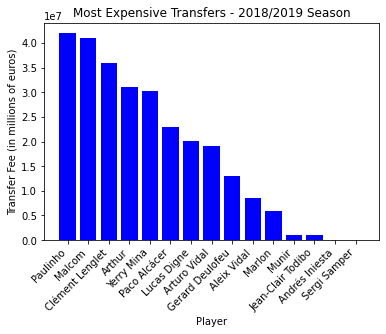

In [23]:

#Create a bar chart
fig, ax = plt.subplots()
ax.bar(top_transfers['Player'], top_transfers['Fee'], color='blue')

#Customize the chart
ax.set_title('Most Expensive Transfers - 2018/2019 Season')
ax.set_xlabel('Player')
ax.set_ylabel('Transfer Fee (in millions of euros)')

#Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

#Show the chart
plt.show()


### <font color="blue">Third question:What was the average transfer fee for players bought by Barcelona during the 2018/2019 season?</font>

<b>To answer this question we can simply combine the transfer in and loans in to calculate the average</b>

In [24]:
#Combine the dataframes
bought = pd.concat([transfer_in, loans_in], ignore_index=True)
print(bought.to_string(index=False))

# calculate the average transfer fee
avg_transfer_fee = bought['Fee'].mean()

# print the result
print(f'\n \n The average transfer fee for players bought by Barcelona during the 2018/2019 season was {avg_transfer_fee:.2f} million euros.')

Entry date Position  No.               Player     From club      Fee Direction Start date      End date
2018-07-09       MF    8               Arthur        Grêmio 31000000        in        NaT           NaN
2018-07-12       DF   15      Clément Lenglet       Sevilla 35900000        in        NaT           NaN
2018-07-24       FW   14               Malcom      Bordeaux 41000000        in        NaT           NaN
2018-08-03       MF   22         Arturo Vidal Bayern Munich 19000000        in        NaT           NaN
2019-01-31       DF    6    Jean-Clair Todibo      Toulouse  1000000        in        NaT           NaN
       NaT       DF   17       Jeison Murillo      Valencia  2000000       NaN 2018-12-20 End of season
       NaT       FW   19 Kevin-Prince Boateng      Sassuolo  1000000       NaN 2019-01-21 End of season

 
 The average transfer fee for players bought by Barcelona during the 2018/2019 season was 18700000.00 million euros.


### <font color="blue">Fourth question:Which positions did Barcelona focus on strengthening during the 2018/2019 season?</font>

<b>To answer this question, we need to analyze the positions of players that were bought by Barcelona during the 2018/2019 season. We can use the DataFrame that we created earlier, which contains information about the players bought by Barcelona.</b>

In [25]:
#Create a new DataFrame that contains the positions of the players bought by Barcelona
positions = pd.DataFrame(bought[['Position']])

#Group the positions by count to see how many players were bought for each position
positions_count = positions.groupby(['Position']).size().reset_index(name='Count')

#Sort the positions by count in descending order to see which positions Barcelona focused on strengthening the most
positions_count_sorted = positions_count.sort_values(by=['Count'], ascending=False)




## <font color="red">Final answer:</font>

<b>From this analysis, we can see that Barcelona focused on strengthening the defense position the most during the 2018/2019 season, with 3 players bought for the position. They also bought two for forward player and same for the midfield.</b>

In [26]:
#Print the result
print(positions_count_sorted.to_string(index=False))

Position  Count
      DF      3
      FW      2
      MF      2


### <font color = "red"> The code given bellow extract data from web, the data is about all barcelone games during 2017/2018 season.</font> 

In [16]:
import requests
import csv
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/2018%E2%80%9319_FC_Barcelona_season'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

# Find the div element containing the match details
match_div = soup.find_all('div', {'class': 'vevent'})

# Open a CSV file to write the data
with open('matches.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    # Loop through each match div and extract the data
    for div in match_div:
        # Find the table element containing the match data
        match_table = div.find('table', {'class': 'mw-collapsible mw-collapsed vevent'})

        # Find all the rows in the table
        rows = match_table.find_all('tr')

        # Loop through the rows and extract the match data
        for row in rows:
            try:
                date = row.find_all('td')[0].find('span').text
                home = row.find_all('td')[1].find('span', {'class': 'fn org'}).text
                result = row.find_all('td')[2].text
                away = row.find_all('td')[3].find('span', {'class': 'fn org'}).text

                # Write the data to the CSV file
                writer.writerow([date, home, result, away])
            except:
                pass


<b> After reviewing the csv file i found that the date of the match repeat twice, 
    so we should clean the data using the code bellow</b>

In [17]:
import csv
import re

# Open the input and output CSV files
with open('matches.csv', 'r', newline='', encoding='utf-8') as infile, \
     open('matches_cleaned.csv', 'w', newline='', encoding='utf-8') as outfile:
    
    # Create a CSV reader and writer objects
    reader = csv.reader(infile, delimiter=',', quotechar='"')
    writer = csv.writer(outfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the header row to the output CSV file
    writer.writerow(next(reader))

    # Loop through each row in the input CSV file
    for row in reader:
        # Remove the data between parentheses using regular expressions
        date = re.sub(r'\([^()]*\)', '', row[0]).strip()

        # Write the cleaned row to the output CSV file
        writer.writerow([date] + row[1:])


<b>Based on the matches_cleaned.csv file there is a several questions can be asked</b>

### <font color="blue">First question: What is the distribution of goals scored by the team who played against Barcelona?<\font>

In [28]:
# Initialize empty list to store scores
opponent_scores = []

# Open the CSV file and read the data
with open('matches_cleaned.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)

    # Loop through each row and extract the opponent score
    for row in reader:
        # Check if Barcelona played at home or away
        if row[1] == ' Barcelona ':
            team = row[3]
            opponent_score = row[2].split('–')[1].strip()
        elif row[3] == ' Barcelona ':
            team = row[1]
            opponent_score = row[2].split('–')[0].strip()
        else:
            continue
        
        # Append the opponent score to the list
        opponent_scores.append(team + opponent_score)
print(opponent_scores)


[' Girona 1', ' Alavés 0', ' Valladolid 0', ' Huesca 2', ' Real Sociedad 1', ' Girona 2', ' Leganés 2', ' Athletic Bilbao 1', ' Valencia 1', ' Sevilla 2', ' Real Madrid 1', ' Rayo Vallecano 2', ' Real Betis 4', ' Atlético Madrid 1', ' Villarreal 0', ' Espanyol 0', ' Levante 0', ' Celta Vigo 0', ' Getafe 1', ' Eibar 0', ' Leganés 1', ' Girona 0', ' Valencia 2', ' Athletic Bilbao 0', ' Valladolid 0', ' Sevilla 2', ' Real Madrid 0', ' Rayo Vallecano 1', ' Real Betis 1', ' Espanyol 0', ' Villarreal 4', ' Atlético Madrid 0', ' Huesca 0', ' Real Sociedad 1', ' Alavés 0', ' Levante 0', ' Celta Vigo 2', ' Getafe 0', ' Eibar 2', ' Cultural Leonesa 0', ' Cultural Leonesa 1', ' Levante 2', ' Levante 0', ' Sevilla 2', ' Sevilla 1', ' Real Madrid 1', ' Real Madrid 0', ' Valencia 2', ' Sevilla 1']


<b>This code reads the matches_cleaned.csv file and loops through each row to extract the score of the team that played against Barcelona. It checks whether Barcelona played at home or away in each match and extracts the opponent score accordingly. It then appends each opponent score to a list called opponent_scores.
Once we have the opponent scores, we can calculate the distribution of goals scored by the team who played against Barcelona. We can use the numpy module in Python to calculate the mean, median, max, min, and standard deviation of the opponent scores, and the matplotlib module to create a histogram to visualize the distribution.</b>

In [19]:
# Extract the number of goals for each team and convert it to a number
goals = []
for i in opponent_scores:
    n = int(''.join(filter(str.isdigit, i)))
    goals.append(n)
print(goals)

[1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 4, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 15, 2, 4, 2, 16, 1, 0, 2, 1]


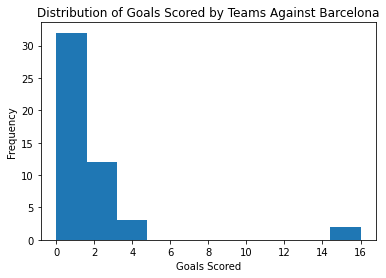

Mean score: 1.63
Median score: 1.00
Standard deviation: 3.06
Max goals scored: 16
Min goals scored: 0


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean, median, and standard deviation of opponent scores
mean_score = np.mean(goals)
median_score = np.median(goals)
std_dev = np.std(goals)
maximum = np.max(goals)
minimum = np.min(goals)
# Create histogram of opponent scores
plt.hist(goals, bins=10)
plt.title('Distribution of Goals Scored by Teams Against Barcelona')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()

# Print mean, median, and standard deviation
print('Mean score: {:.2f}'.format(mean_score))
print('Median score: {:.2f}'.format(median_score))
print('Standard deviation: {:.2f}'.format(std_dev))
print('Max goals scored:',maximum)
print('Min goals scored:',minimum)



### <font color="blue">Second question:What was the highest-scoring match in terms of total goals?</font>


<b>To answer this question we need to calculate the total number of goals scored in each match and then find the match with the highest number of goals</b>

In [43]:
# Read the CSV file
df = pd.read_csv('matches_cleaned.csv', header=None)

# Set column names
df.columns = ['Date', 'Home Team', 'Score', 'Away Team']

# Convert score column to a list of tuples
score_tuples = [tuple(map(int, score.split('–'))) for score in df['Score']]

# Add new columns for home and away goals
df['Home Goals'] = [score[0] for score in score_tuples]
df['Away Goals'] = [score[1] for score in score_tuples]

# Calculate total goals
df['Total Goals'] = df['Home Goals'] + df['Away Goals']

# Find the highest-scoring match
highest_scoring_match = df.loc[df['Total Goals'].idxmax()]

# Print the result
print(f"The highest-scoring match was: {highest_scoring_match['Home Team']} {highest_scoring_match['Score']} {highest_scoring_match['Away Team']} with a total of {highest_scoring_match['Total Goals']} goals.")


The highest-scoring match was:  Barcelona  8–2  Huesca  with a total of 10 goals.


### <font color="blue">Third question:What is the average number of goals scored per match?</font>

<b>Here are the code that can answer the question:</b>

In [33]:
total_goals = 0
num_matches = 0

with open('matches_cleaned.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header row
    
    for row in reader:
        goals = row[2].split('–')  # split score into home and away goals
        total_goals += int(goals[0]) + int(goals[1])  # add up total goals in match
        num_matches += 1
    
avg_goals = total_goals / num_matches

print('The average number of goals scored per match is:', avg_goals)


The average number of goals scored per match is: 3.203125


### <font color="blue">Fourth question: Are there any patterns in the times of the year or days of the week when Barcelona played their matches?</font>


Matches played by month:
         Month  Opponent
0       April         8
1      August         5
2    December         6
3    February         7
4     January         8
5        July         1
6       March         6
7         May         6
8    November         5
9     October         6
10  September         6

Matches played by day of the week:
    DayOfWeek  Opponent
0   Saturday        21
1     Sunday        17
2   Thursday         2
3    Tuesday         9
4  Wednesday        15


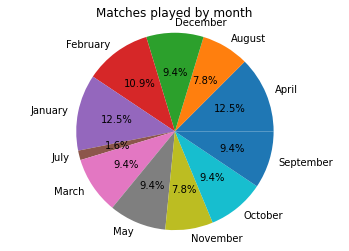

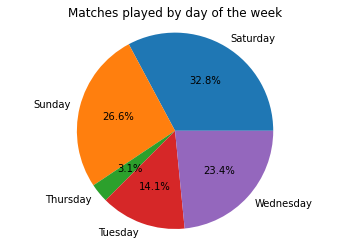

In [56]:
from datetime import datetime

# Read the CSV file into a pandas dataframe
df = pd.read_csv('matches_cleaned.csv')
df.columns = ['Date', 'Home Team', 'Score', 'Opponent']

# Convert the "Date" column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Extract the month and day of the week into separate columns
df['Month'] = df['Date'].dt.month_name()
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group the data by month and day of the week, and count the number of matches played
matches_by_month = df.groupby('Month')['Opponent'].count().reset_index()
matches_by_day = df.groupby('DayOfWeek')['Opponent'].count().reset_index()

# Print the results
print('Matches played by month:\n', matches_by_month)
print('\nMatches played by day of the week:\n', matches_by_day)

# Create a pie chart of matches played by month
plt.pie(matches_by_month['Opponent'], labels=matches_by_month['Month'], autopct='%1.1f%%')
plt.title('Matches played by month')
plt.axis('equal')
plt.show()

# Create a pie chart of matches played by day of the week
plt.pie(matches_by_day['Opponent'], labels=matches_by_day['DayOfWeek'], autopct='%1.1f%%')
plt.title('Matches played by day of the week')
plt.axis('equal')
plt.show()

### Answer:
<b>Based on the output, and the two chart it appears that Barcelona tends to play more matches on Saturdays and Sundays, with a total of 21 and 17 matches played on these days, respectively. There is also a slightly higher number of matches played in the months of April, January, and February.</b>

### <font color="blue">6th question: Whether there have been any significant changes in Barcelona's performance over time?</font>

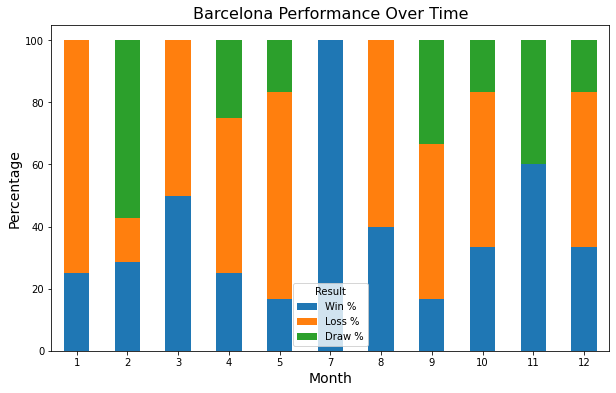

In [29]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('matches_cleaned.csv')
df.columns = ['Date', 'Home Team', 'Score', 'Opponent']
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Define a function to determine the match result (win, loss, or draw) for Barcelona
def get_result(row):
    if row['Home Team'] == 'Barcelona':
        barca_score = int(row['Score'].split('–')[0])
        opponent_score = int(row['Score'].split('–')[1])
    else:
        barca_score = int(row['Score'].split('–')[1])
        opponent_score = int(row['Score'].split('–')[0])
    if barca_score > opponent_score:
        return 'Win'
    elif barca_score < opponent_score:
        return 'Loss'
    else:
        return 'Draw'

# Create a new column "Result" to indicate the match result for Barcelona
df['Result'] = df.apply(get_result, axis=1)

# Group the data by year and count the number of matches won, lost, and drawn
df['Month'] = df['Date'].dt.month
monthly_results = df.groupby('Month')['Result'].value_counts().unstack().fillna(0)

# Calculate the total number of matches played each year
monthly_results['Total Matches'] = monthly_results.sum(axis=1)

# Calculate the percentage of matches won, lost, and drawn each year
monthly_results['Win %'] = round(monthly_results['Win'] / monthly_results['Total Matches'] * 100, 2)
monthly_results['Loss %'] = round(monthly_results['Loss'] / monthly_results['Total Matches'] * 100, 2)
monthly_results['Draw %'] = round(monthly_results['Draw'] / monthly_results['Total Matches'] * 100, 2)

# Plot the percentage of matches won, lost, and drawn each year
ax = monthly_results[['Win %', 'Loss %', 'Draw %']].plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Barcelona Performance Over Time', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.show()
